### 📄 Notebook Description — Univariate Analysis

In this notebook, I performed univariate analysis on the combined and cleaned ODI dataset (`CombinedcleanedOdiStats.csv`).  
Using **Seaborn** and **Matplotlib**, I visualized individual statistical features such as runs, averages, strike rates, boundaries, and ratings.  
The goal of this notebook is to understand the distribution, spread, and patterns of each feature before moving into deeper analysis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("CombinedcleanedOdiStats.csv")
df

,PlayerName,Matches,Innings,Average,StrikeRate,HighestScore,4s,6s,50s,100s,Runs,Gender
0,Sachin Tendulkar,463,452,44.83,86.23,200,2016.0,195.0,96,49,18426,Men
1,Virat Kohli,305,293,57.71,93.26,183,1332.0,152.0,75,51,14255,Men
2,Rohit Sharma,276,268,49.22,92.66,264,1066.0,349.0,59,33,11370,Men
3,Sourav Ganguly,311,300,41.02,73.70,183,1122.0,190.0,72,22,11363,Men
4,Rahul Dravid,344,318,39.16,71.23,153,950.0,42.0,83,12,10889,Men
...,...,...,...,...,...,...,...,...,...,...,...,...
366,Bindeshwari Goyal,4,1,0.00,25.00,1,NaN,NaN,0,0,1,Women
367,Samantha Lobatto,3,2,0.00,12.50,1,NaN,NaN,0,0,1,Women
368,Anjali Sharma,3,3,0.33,NaN,1,NaN,NaN,0,0,1,Women
369,Rita Patel,1,1,1.00,NaN,1,NaN,NaN,0,0,1,Women


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PlayerName    371 non-null    object 
 1   Matches       371 non-null    int64  
 2   Innings       371 non-null    int64  
 3   Average       371 non-null    float64
 4   StrikeRate    322 non-null    float64
 5   HighestScore  371 non-null    int64  
 6   4s            254 non-null    float64
 7   6s            154 non-null    float64
 8   50s           371 non-null    int64  
 9   100s          371 non-null    int64  
 10  Runs          371 non-null    int64  
 11  Gender        371 non-null    object 
dtypes: float64(4), int64(6), object(2)
memory usage: 34.9+ KB


In [4]:
total_players = df['PlayerName'].nunique()
print("Total number of distinct players who have played for India:", total_players)

Total number of distinct players who have played for India: 371


## 1.)Gender Distribution of Players

In [5]:
# Calculate Gender counts
gender_counts = df['Gender'].value_counts().reset_index()
# Rename columns for clarity
gender_counts.columns = ['Gender', 'Count']
print(gender_counts)

  Gender  Count
0    Men    236
1  Women    135


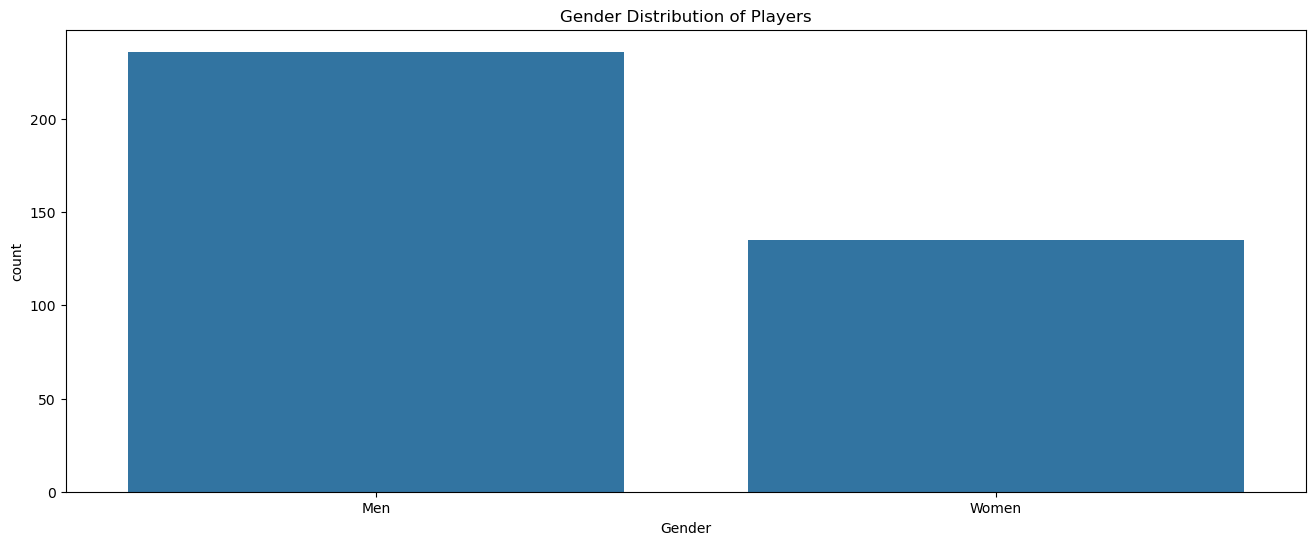

In [21]:
plt.figure(figsize=(16, 6))   # same size as your screenshot

sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution of Players')

plt.savefig("gender_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

## 2.)Distribution of Total Runs Scored

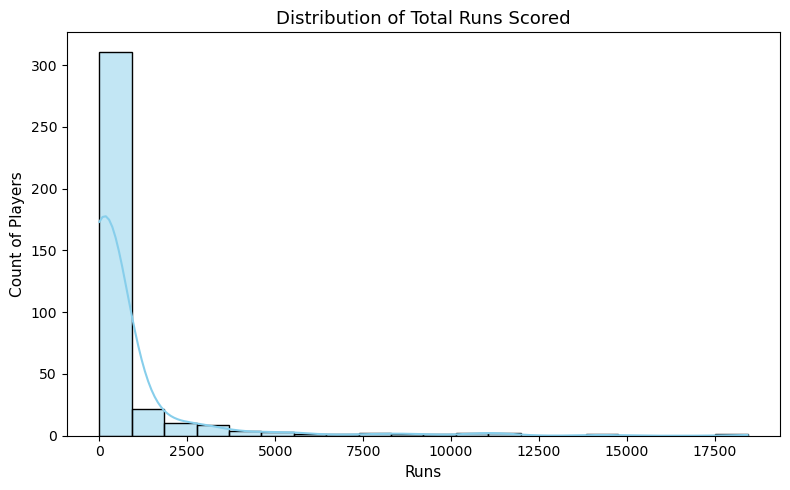

## 3.)Distribution of Batting Averages

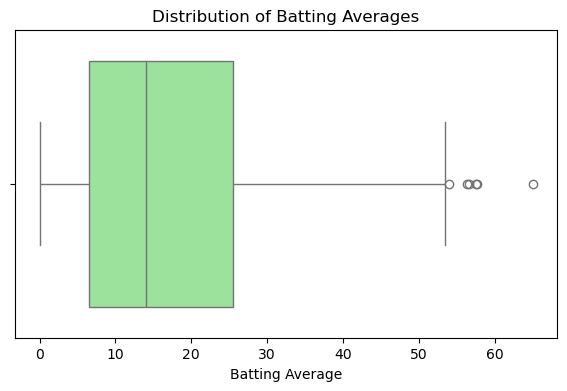

In [11]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Average', data=df, color='lightgreen')
plt.title('Distribution of Batting Averages')
plt.xlabel('Batting Average')
plt.show()

## 4.)Distribution of Strike Rate

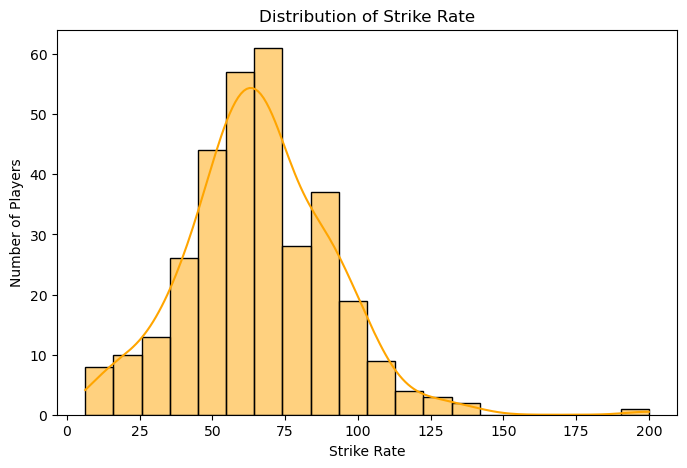

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df['StrikeRate'], bins=20, kde=True, color='orange')
plt.title('Distribution of Strike Rate')
plt.xlabel('Strike Rate')
plt.ylabel('Number of Players')
plt.show()

## 5.)Frequency of Centuries (100s) Scored by Players

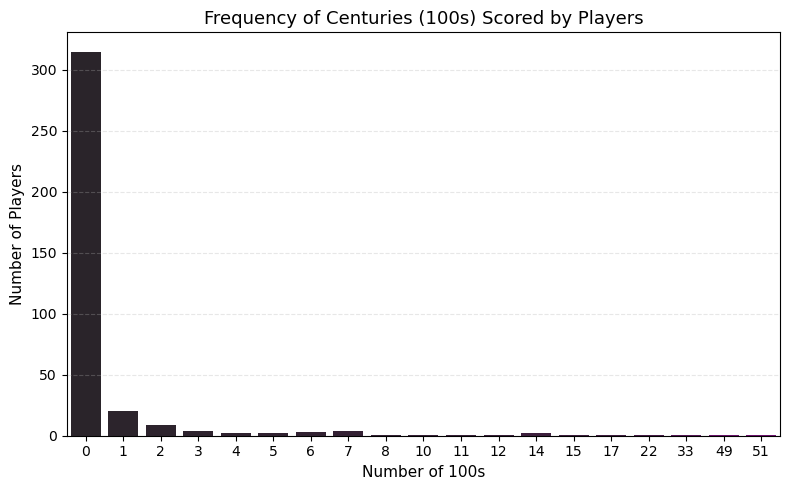

In [38]:
plt.figure(figsize=(8,5))
sns.countplot(
    x='100s',
    data=df,
    hue='100s',           
    palette='dark:purple', 
    legend=False
)

plt.title('Frequency of Centuries (100s) Scored by Players', fontsize=13, color='black')
plt.xlabel('Number of 100s', fontsize=11)
plt.ylabel('Number of Players', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## 6.)Frequency of Half-Centuries (50s) Scored by Players

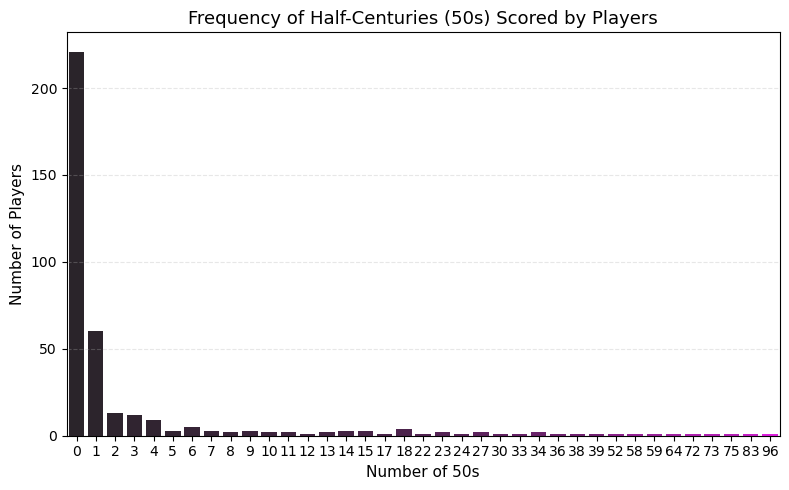

In [55]:
plt.figure(figsize=(8,5))
sns.countplot(
    x='50s',
    data=df,
    hue='50s',              
    palette='dark:magenta',  
    legend=False
)

plt.title('Frequency of Half-Centuries (50s) Scored by Players', fontsize=13, color='black')
plt.xlabel('Number of 50s', fontsize=11)
plt.ylabel('Number of Players', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## 7.)Average Number of Fours per Player

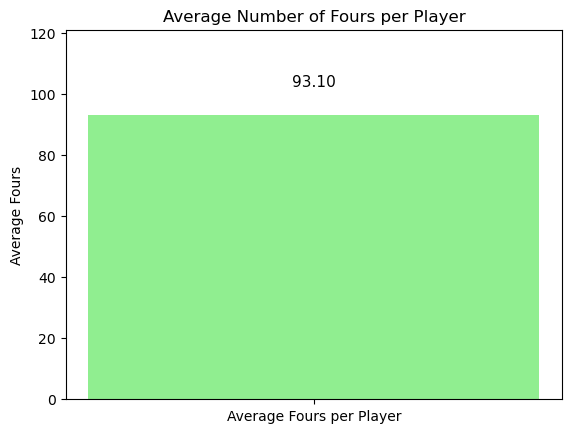

In [33]:
# Calculate average number of 4s
avg_fours = df['4s'].mean()

# Plot
plt.bar(['Average Fours per Player'], [avg_fours], color='lightgreen')
plt.title('Average Number of Fours per Player')
plt.ylabel('Average Fours')

# Extend y-axis slightly and add label above bar
plt.ylim(0, avg_fours * 1.3)
plt.text(0, avg_fours * 1.1, f"{avg_fours:.2f}", ha='center', fontsize=11)

plt.show()

## 8.)Average Number of Sixes per Player

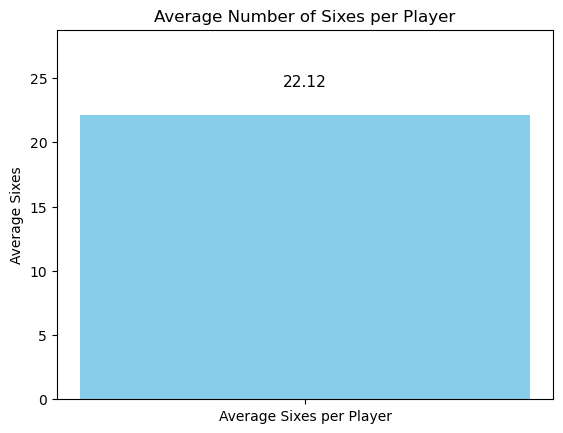

In [31]:
avg_sixes = df['6s'].mean()

plt.bar(['Average Sixes per Player'], [avg_sixes], color='skyblue')
plt.title('Average Number of Sixes per Player')
plt.ylabel('Average Sixes')

# Extend y-axis limit to create space for label
plt.ylim(0, avg_sixes * 1.3)

# Add label above bar (now won’t overlap)
plt.text(0, avg_sixes * 1.1, f"{avg_sixes:.2f}", ha='center', fontsize=11)

plt.show()

## 9.)Player with Highest Individual Score

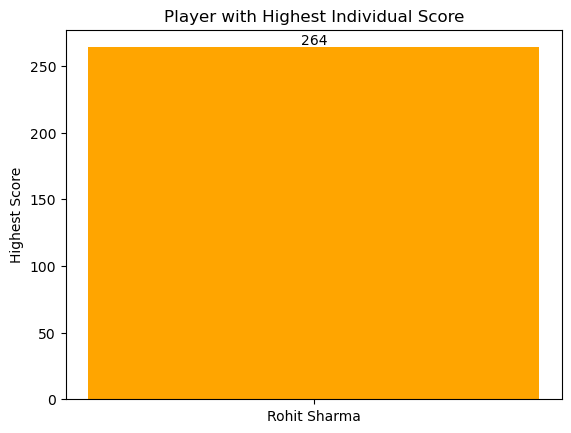

In [30]:
# Find player with highest score
top_player = df.loc[df['HighestScore'].idxmax()]

plt.bar([top_player['PlayerName']], [top_player['HighestScore']], color='orange')
plt.title('Player with Highest Individual Score')
plt.ylabel('Highest Score')

# Add value label above bar
plt.text(0, top_player['HighestScore'] + 2, int(top_player['HighestScore']), ha='center')

plt.show()

## 10.)Distribution of Highest Individual Scores

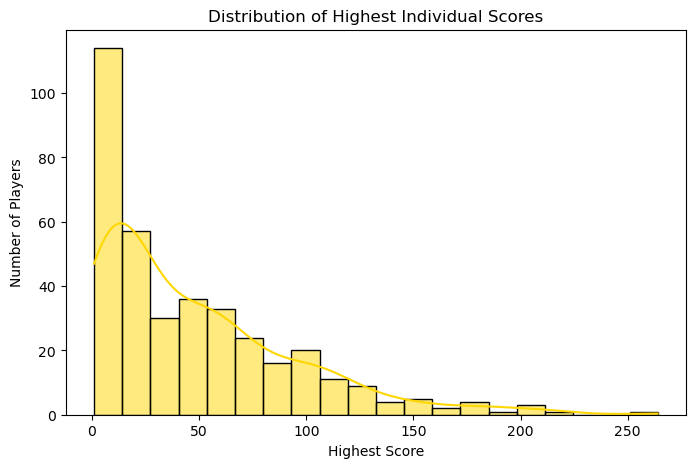

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df['HighestScore'], bins=20, kde=True, color='gold')
plt.title('Distribution of Highest Individual Scores')
plt.xlabel('Highest Score')
plt.ylabel('Number of Players')
plt.show()